<a href="https://colab.research.google.com/github/Eric428-a/DataAnalysisProject/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Import necessary libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt


In [18]:
import seaborn as sns

In [21]:
# Load the data
# Assuming the data is in a CSV file named 'data.csv', we can load it into a pandas DataFrame.

In [10]:
df = pd.read_csv("/content/winequality-white.csv")

In [22]:
# Inspect the Data
# Get a quick overview of the data using the head(), info(), and describe() methods.

In [11]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [13]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

In [23]:
# Check for Missing Values
# Missing values can significantly impact the results of your analysis. Use the isnull() function to check for missing values.

In [14]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [24]:
# Handle Missing Values
# Depending on the nature of your data and the amount of missing data, you might decide to fill missing values with a specific value (like the mean or median), interpolate them, or drop the rows/columns containing them.
# Fill missing values with the mean

In [25]:
df.fillna(df.mean(), inplace=True)

In [ ]:
# Check for Duplicate Values
# Duplicate values can skew your analysis. Use the duplicated() function to check for duplicate rows.

In [15]:
print(df.duplicated().sum())


937


In [26]:
# Remove Duplicate Values
# If there are duplicates, you can remove them using the drop_duplicates() function.

In [16]:
df.drop_duplicates(inplace=True)

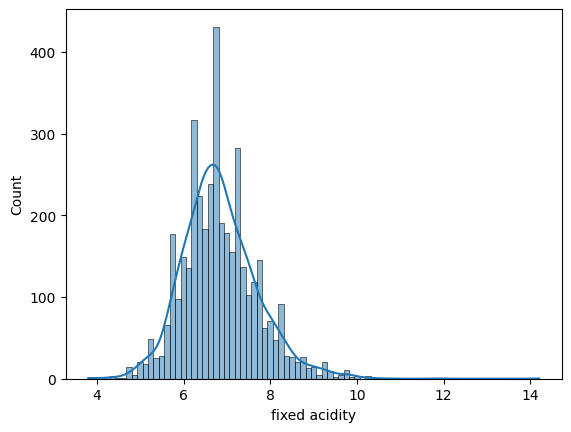

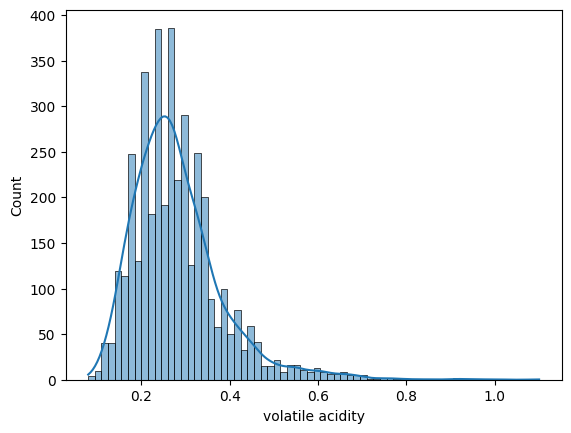

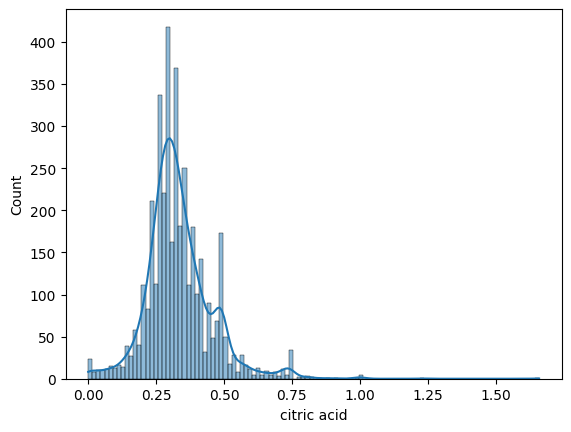

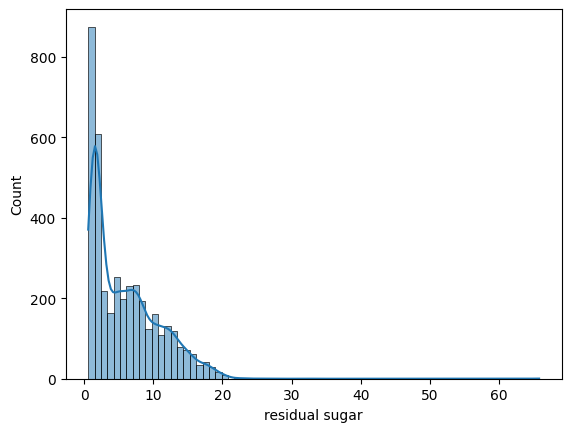

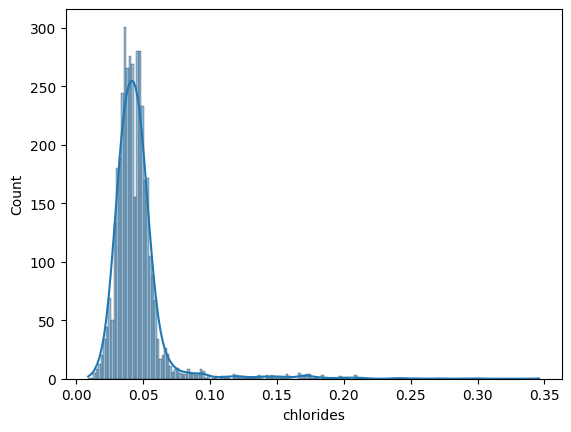

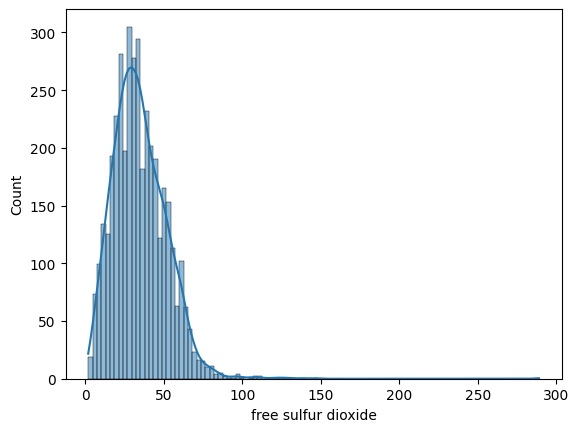

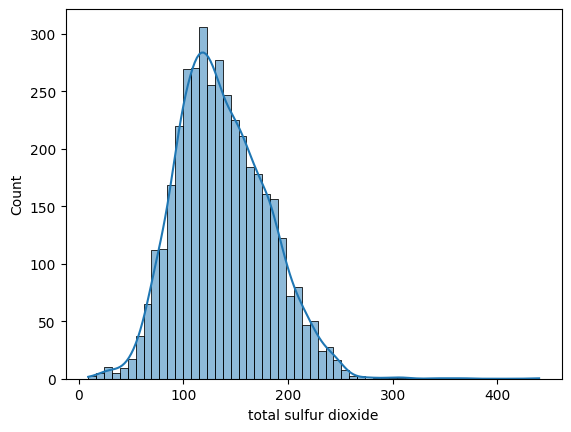

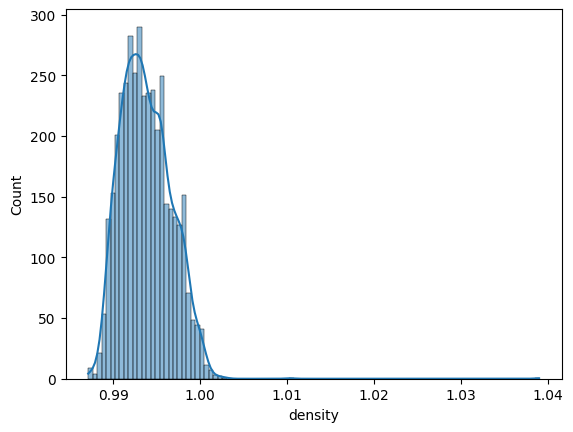

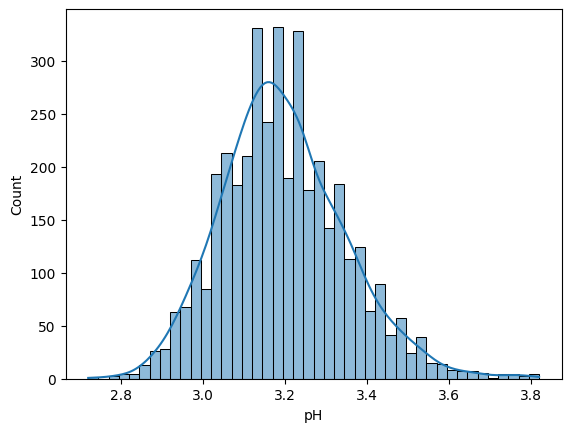

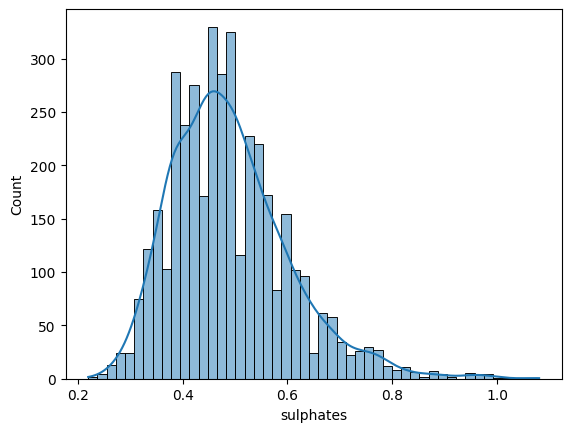

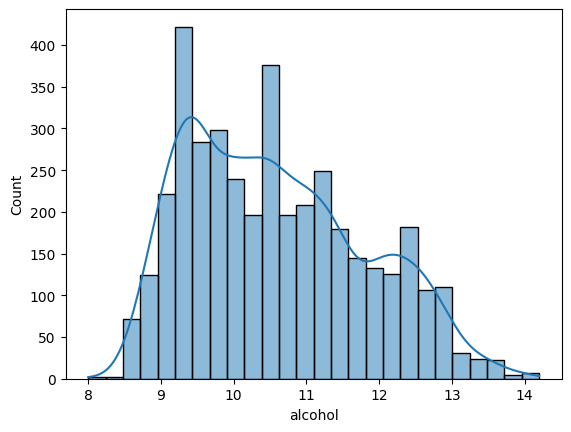

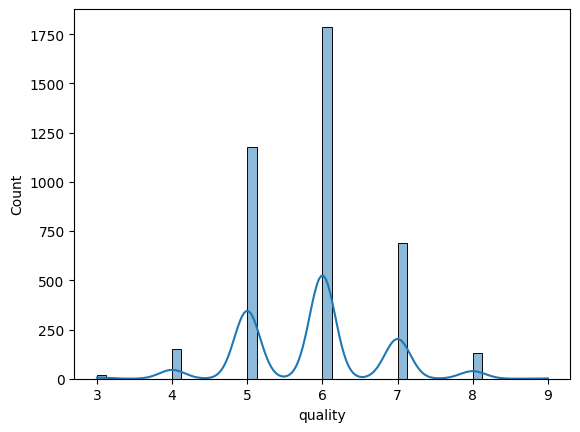

In [19]:
# Visualize the Data
# Visualizing the data can provide valuable insights. You can use libraries like Matplotlib and Seaborn for this purpose.
# Here, we will create histograms with kernel density estimation curves.
# Histogram with kernel density estimation
for column in df.columns:
    sns.histplot(df[column], kde=True)
    plt.show()

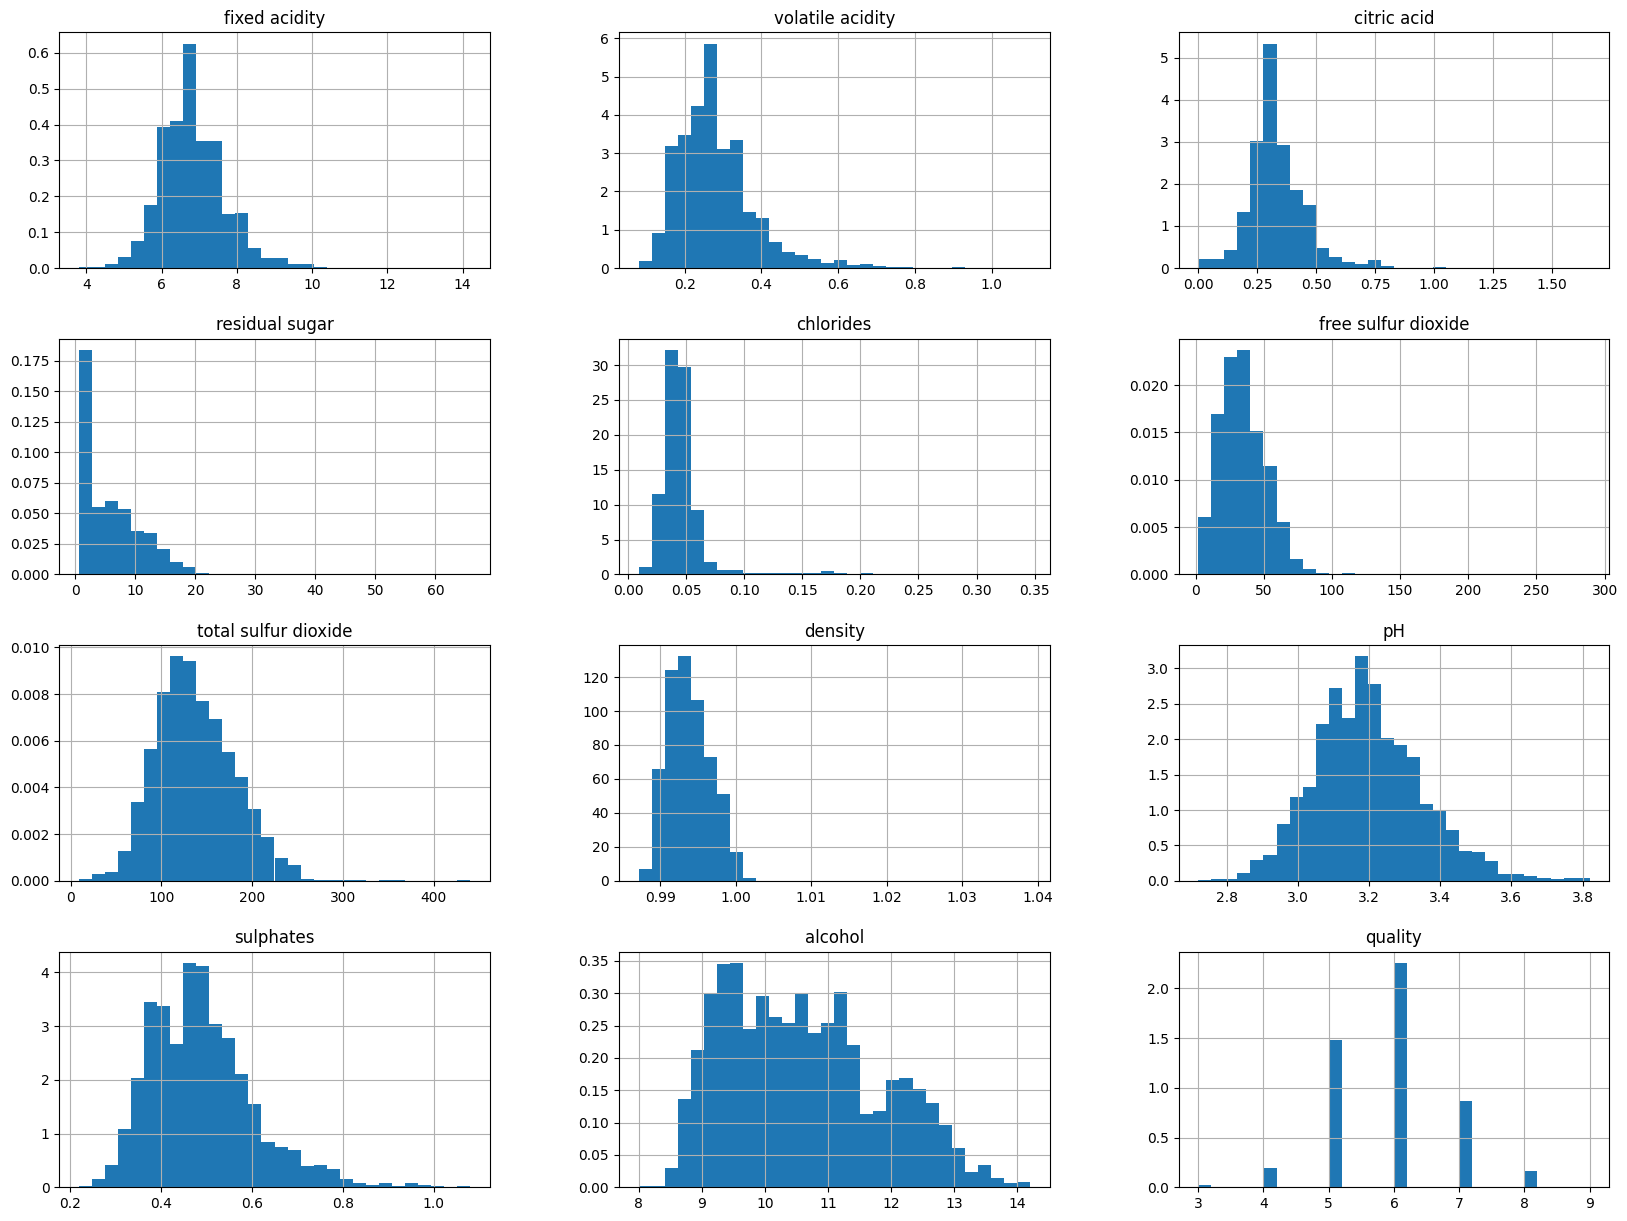

In [27]:
# Check Data Distribution
# Check the distribution of data in each column. This can help identify skewness, outliers, or other distribution characteristics.
df.hist(bins=30, figsize=(20,15), density=True)
plt.show()

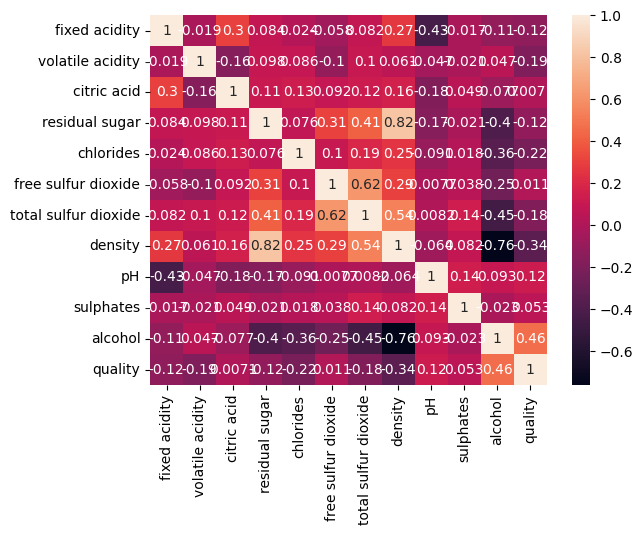

In [28]:
# Check Correlations
# Check the correlation between different variables in your dataset. This can help identify relationships between different variables.
# Correlation matrix
sns.heatmap(df.corr(), annot=True)
plt.show()

In [30]:
# Handle Categorical Variables
# If your data contains categorical variables, you might need to encode them into numerical values using techniques like one-hot encoding or label encoding.
df = pd.get_dummies(df, drop_first=True)


In [32]:
# Outlier Detection
# Outliers can significantly impact your analysis and statistical models. Use methods like the IQR score or Z-score to detect and handle outliers.
Q1 = df.quantile(0.25)

In [33]:
Q3 = df.quantile(0.75)

In [34]:
IQR = Q3 - Q1

In [35]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [36]:
# Feature Scaling
# If your dataset contains features with different scales, you might need to scale them to a standard scale.

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)